#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 03
**CH03D Distributions of body height and income**

height-income-distributions  dataset

version 1.0 2021-05-05

In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
data_in = dirname + "da_data_repo/height-income-distributions/clean/"
data_out = dirname + "da_case_studies/ch03-distributions-height-income/"
output = dirname + "da_case_studies/ch03-distributions-height-income/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)


In [3]:
# Import the prewritten helper functions
import py_helper_functions as da
sns.set_theme(rc=da.da_theme, palette=da.color)


NameError: name 'sns' is not defined

#### Load in clean and tidy data and create workfile

In [ ]:
hrs = pd.read_csv(data_in + "hrs_height_income.csv")


In [ ]:
hrs["height"] = hrs["height"].apply(pd.to_numeric, errors="coerce")


In [ ]:
filtered_women = hrs.loc[
    (hrs["age"] >= 55)
    & (hrs["age"] < 60)
    & (hrs["female"] == 1)
    & (hrs["height"] > 1.3)
    & (hrs["height"] < 2.1)
]

In [ ]:
hrs.height.describe()


count    18660.000000
mean         1.677539
std          0.104078
min          1.003300
25%          1.600200
50%          1.676400
75%          1.752600
max          2.324100
Name: height, dtype: float64

#### Distribution of Height

In [ ]:
# Statistics for density plot
mean = np.mean(filtered_women["height"])
std_dev = np.std(filtered_women["height"])
x_vals = np.linspace(min(filtered_women["height"]), max(filtered_women["height"]), 100)

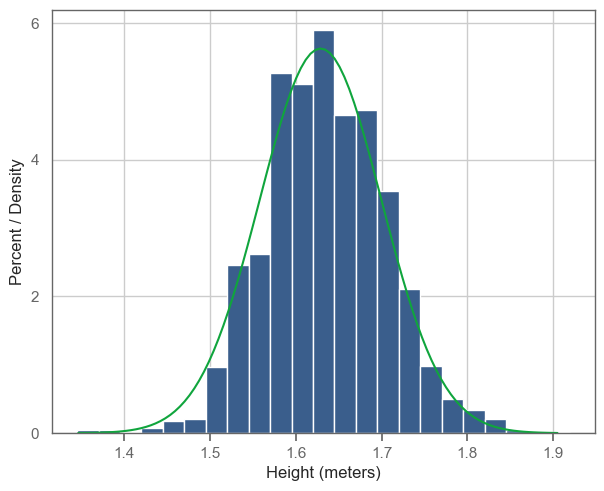

<Figure size 1000x600 with 0 Axes>

In [ ]:
sns.histplot(
    filtered_women["height"],
    bins=23,
    binrange=(1.345,1.92),
    stat='density',  
    color=da.color[0],
    fill=True,
    edgecolor='white',  
    alpha=1,
    element="bars",
)
plt.plot(x_vals, norm.pdf(x_vals, mean, std_dev), color=da.color[1])
plt.yticks(ticks=np.arange(0, 6.1, 2))
plt.xticks(ticks=np.arange(1.4, 1.95, 0.1))
plt.xlabel("Height (meters)")
plt.ylabel("Density")
plt.figure(figsize=(10, 6))
plt.show()

##### LOGNORMAL: family income of women age 55-59 


In [ ]:
# filter dataset
filtered_women_income = hrs.loc[
    (hrs["age"] >= 55)
    & (hrs["age"] < 60)
    & (hrs["female"] == 1)
    & (hrs["hhincome"] > 1)
    & (hrs["hhincome"] < 1000)
]

In [ ]:
filtered_women_income["hhincome"].describe()


count    1918.000000
mean       74.931920
std        87.185212
min         1.200000
25%        19.704000
50%        48.000000
75%       100.800000
max       945.000000
Name: hhincome, dtype: float64

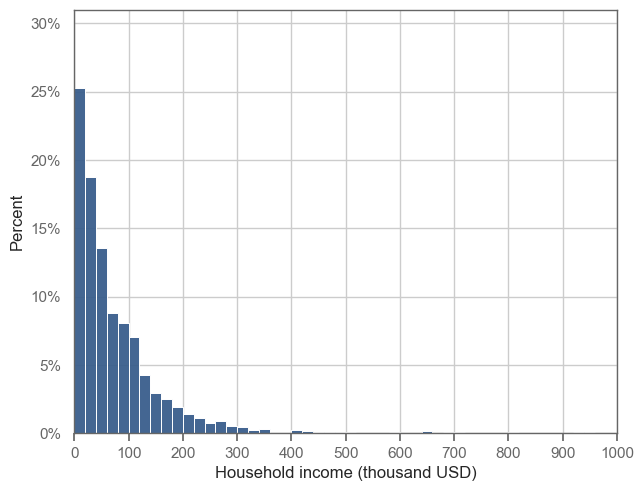

<Figure size 1000x600 with 0 Axes>

In [ ]:
sns.histplot(
    filtered_women_income['hhincome'],
    binwidth=20,  
    binrange=(0,1000),
    color=da.color[0],
    fill=True,
    edgecolor='white', 
    alpha=0.95,
    stat="probability", 
    element="bars"
)


plt.xlabel("Household income (thousand USD)")
plt.ylabel("Percent")
plt.xlim(0, 1000)  
plt.xticks(np.arange(0, 1001, 100))  
plt.ylim(0, 0.31)  
plt.yticks(np.arange(0, 0.31, 0.05), labels=[f'{int(t*100)}%' for t in np.arange(0, 0.31, 0.05)]) 
plt.grid(True)
plt.figure(figsize=(10, 6))
plt.show()

In [ ]:
# ln income
filtered_women_income["lnincome"] = np.log(filtered_women_income["hhincome"])


In [ ]:
mean = np.mean(filtered_women_income["lnincome"])
std_dev = np.std(filtered_women_income["lnincome"])
x_vals = np.linspace(min(filtered_women_income["lnincome"]), max(filtered_women_income["lnincome"]), 100)

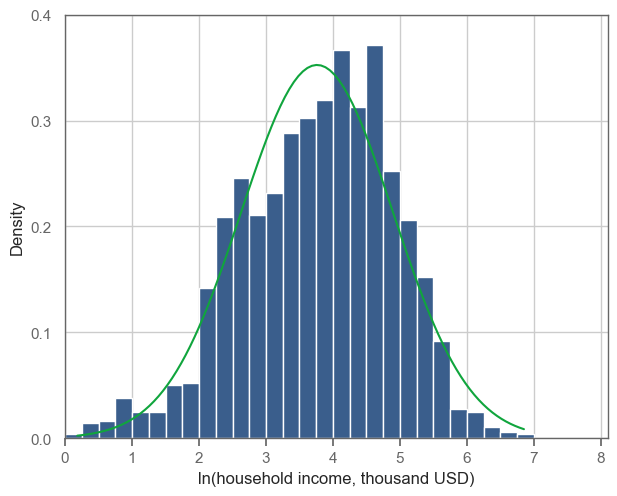

In [ ]:
sns.histplot(
    filtered_women_income["lnincome"],
    binwidth=0.25,
    binrange=(0,8),
    stat='density',
    color=da.color[0],
    fill=True,
    edgecolor='white',
    alpha=1,
    #kde=False,
)


plt.plot(x_vals, norm.pdf(x_vals, mean, std_dev), color=da.color[1])
plt.xlabel("ln(household income, thousand USD)")
plt.ylabel("Density")
plt.xlim(0, 8.1)
plt.xticks(np.arange(0, 8.2, 1))
plt.ylim(0, 0.4)
plt.yticks(np.arange(0, 0.41, 0.1))
plt.margins(x=0.01, y=0.01)
plt.show()